<a href="https://colab.research.google.com/github/sukanyapanigrahi09/My-Python-Journey/blob/main/Laptop_Price_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
df = pd.read_csv('/content/laptop_prices.csv')

In [ ]:
# Display the first few rows to understand its structure
print(df.head())
# Basic info about the dataset
print(df.info())
# Summary statistics
print(df.describe(include='all'))
# Check for missing values
print(df.isnull().sum())

  Company      Product   TypeName  Inches  Ram     OS  Weight  Price_euros  \
0   Apple  MacBook Pro  Ultrabook    13.3    8  macOS    1.37      1339.69   
1   Apple  Macbook Air  Ultrabook    13.3    8  macOS    1.34       898.94   
2      HP       250 G6   Notebook    15.6    8  No OS    1.86       575.00   
3   Apple  MacBook Pro  Ultrabook    15.4   16  macOS    1.83      2537.45   
4   Apple  MacBook Pro  Ultrabook    13.3    8  macOS    1.37      1803.60   

     Screen  ScreenW  ...  RetinaDisplay CPU_company CPU_freq      CPU_model  \
0  Standard     2560  ...            Yes       Intel      2.3        Core i5   
1  Standard     1440  ...             No       Intel      1.8        Core i5   
2   Full HD     1920  ...             No       Intel      2.5  Core i5 7200U   
3  Standard     2880  ...            Yes       Intel      2.7        Core i7   
4  Standard     2560  ...            Yes       Intel      3.1        Core i5   

  PrimaryStorage  SecondaryStorage PrimaryStorageT

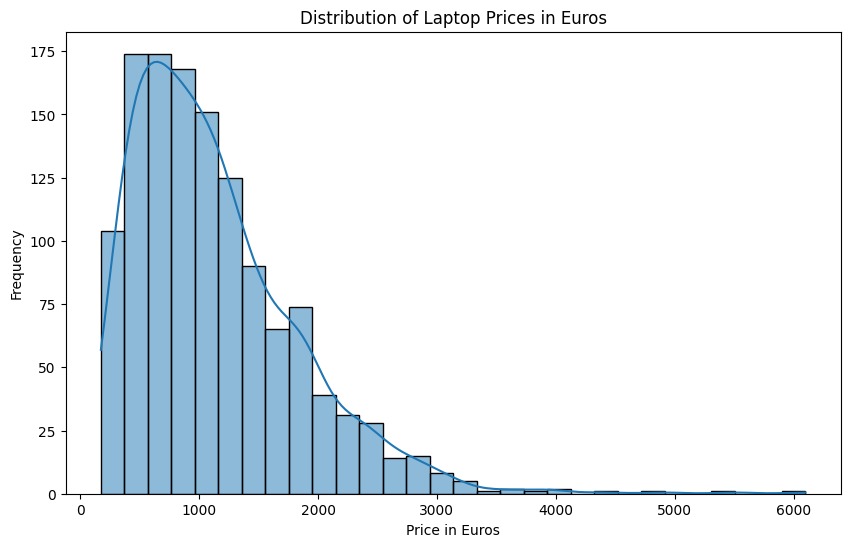

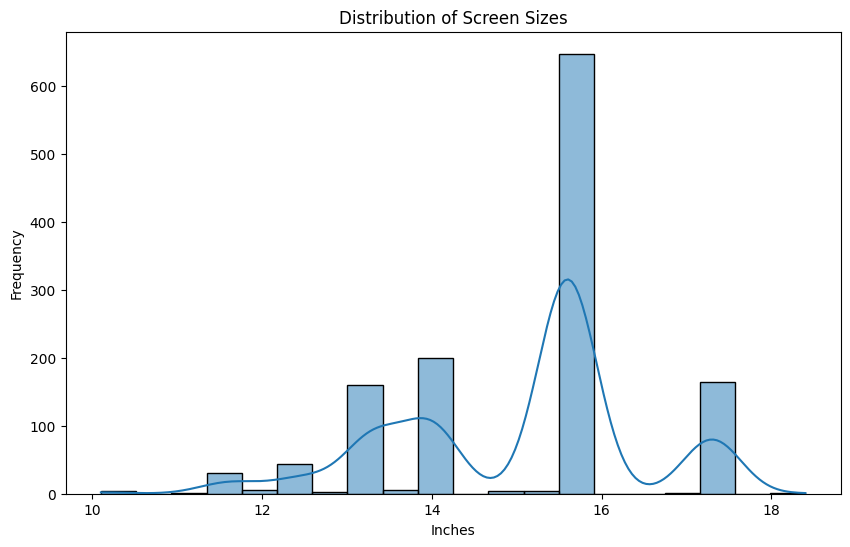

In [ ]:
# Visualize the distribution of prices
plt.figure(figsize=(10,6))
sns.histplot(df['Price_euros'], bins=30, kde=True)
plt.title('Distribution of Laptop Prices in Euros')
plt.xlabel('Price in Euros')
plt.ylabel('Frequency')
plt.show()
# Visualize the distribution of screen sizes
plt.figure(figsize=(10,6))
sns.histplot(df['Inches'], bins=20, kde=True)
plt.title('Distribution of Screen Sizes')
plt.xlabel('Inches')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Convert numerical columns to numeric types, coercing errors to NaN
for col in ['Inches', 'Ram', 'Weight', 'Price_euros', 'ScreenW', 'ScreenH', 'CPU_freq','PrimaryStorage', 'SecondaryStorage']: df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
# Drop rows with missing values in critical columns
df_clean = df.dropna(subset=['Price_euros', 'Inches', 'Ram', 'Weight', 'CPU_freq'])
# Select only numerical columns for correlation
numerical_cols = ['Inches', 'Ram', 'Weight', 'Price_euros', 'ScreenW', 'ScreenH', 'CPU_freq','PrimaryStorage', 'SecondaryStorage']
# Ensure these columns are numeric
for col in numerical_cols: df[col] = pd.to_numeric(df[col], errors='coerce')
# Drop rows with missing values in these columns
df_clean_num = df.dropna(subset=numerical_cols)
# Compute the correlation matrix
corr_matrix = df_clean_num[numerical_cols].corr()

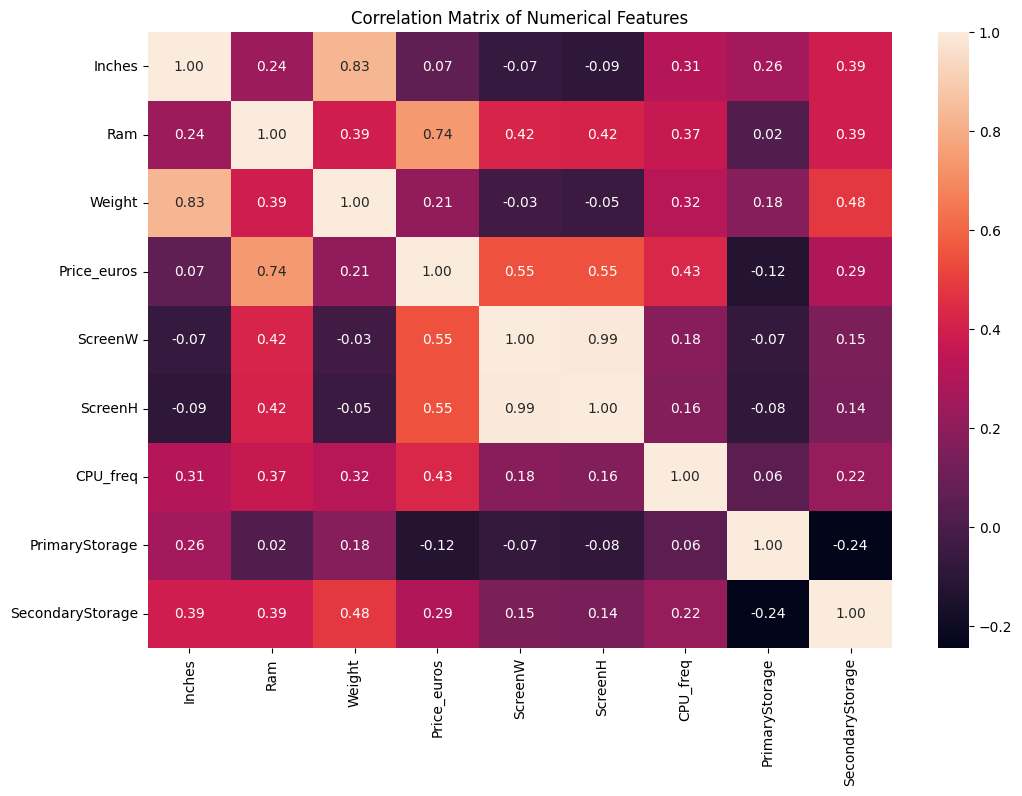

In [ ]:
# Plot the heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()